In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB



In [2]:
df = pd.read_csv('spambase.data', header=None)
print(df.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


Detalhes: algumas colunas, a exemplo 55 e 56, possuem valores em um range desproporcional ao range das demais colunas. Corrigiremos este problema utilizando uma normalização dos valores 

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [4]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


Normalização

In [5]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X = pd.DataFrame(X)


In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.000000,0.002248,0.002248,0.0,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.002733,0.000000,0.000000,0.013195,0.214296,0.976627
1,0.000203,0.000271,0.000484,0.0,0.000136,0.000271,0.000203,0.000068,0.000000,0.000910,...,0.0,0.000000,0.000128,0.0,0.000360,0.000174,0.000046,0.004951,0.097776,0.995188
2,0.000026,0.000000,0.000307,0.0,0.000532,0.000082,0.000082,0.000052,0.000277,0.000108,...,0.0,0.000004,0.000062,0.0,0.000119,0.000080,0.000004,0.004251,0.209911,0.977710
3,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.0,0.000000,0.000702,0.0,0.000702,0.000000,0.000000,0.018119,0.204911,0.978452
4,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.0,0.000000,0.000692,0.0,0.000692,0.000000,0.000000,0.018119,0.204911,0.978452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.003519,0.000000,0.007039,0.0,0.000000,0.003519,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.002634,0.0,0.000000,0.000000,0.000000,0.012965,0.034058,0.999024
4597,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.021954,0.000000,0.000000,0.096708,0.248768,0.870687
4598,0.002538,0.000000,0.002538,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000863,0.006075,0.0,0.000000,0.000000,0.000000,0.011878,0.050763,0.998331
4599,0.012276,0.000000,0.000000,0.0,0.004092,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000729,0.0,0.000000,0.000000,0.000000,0.014667,0.063937,0.997423


Divisão em Treinamento, Validação e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)


Primeiro passo: usar o conjunto de validação para encontrar os hiperparâmetros ideais


In [8]:
scoring = ['precision', 'recall', 'f1']
train_scores_precision,train_scores_recall, train_scores_f1, media_geral = [], [],[], []


In [9]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
naive_bayes.score(X_val,y_val)

0.7753623188405797

In [ ]:
test_size = np.arange(0.95, 0.049, -0.05)
lista_precision, lista_recall, lista_f1, lista_acc = [],[],[], []

for div in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=div, random_state=42, stratify=y)
    naive_bayes.fit(X_train, y_train)
    scores = cross_validate(naive_bayes, X_test, y_test, scoring=scoring)
    lista_acc.append(naive_bayes.score(X_test, y_test))
    lista_precision.append(scores['test_precision'].mean())
    lista_recall.append(scores['test_recall'].mean())
    lista_f1.append(scores['test_f1'].mean())

print("Accuracy:", lista_acc)
print('Precision:', lista_precision)
print('Recall:', lista_recall)
print('F1:', lista_f1)

Precision: [0.6394130227953825, 0.6486571783643009, 0.655278354117355, 0.6523782038034565, 0.6585203164581352, 0.6537087809680984, 0.6545451295841469, 0.6513738621433227, 0.6568732099136996, 0.6564117391532209, 0.6732037473052002, 0.6690715018661976, 0.669421267943953, 0.6829090446306909, 0.6939593771530935, 0.7071414944057292, 0.7148308930033378, 0.7546585848589807, 0.775185394315829]
Recall: [0.9593596225143243, 0.9540365096339656, 0.9617135291892573, 0.9586206896551724, 0.9566176470588236, 0.9511562042886931, 0.95250631085467, 0.9466537014332219, 0.9437889447236181, 0.9459534940197925, 0.9485261110279813, 0.9475862068965517, 0.9385826771653543, 0.9338090383961944, 0.9317704517704518, 0.9227549467275494, 0.9118518518518519, 0.8845345345345346, 0.9011695906432748]
F1: [0.7673309359943505, 0.7720879391552506, 0.7794370961008582, 0.7763555628951627, 0.7800105713453771, 0.7747985280971527, 0.7757003516237345, 0.7716216206155609, 0.7744311050951456, 0.7748140611824208, 0.7872490871947628,

In [17]:
lista_media_geral = [(lista_acc[i]+lista_f1[i]+lista_precision[i]+lista_recall[i])/4 for i in range(len(lista_acc))]

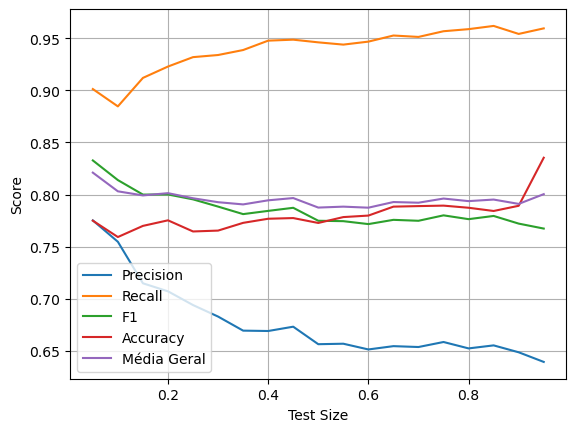

In [18]:
plt.plot(test_size, lista_precision, label='Precision')
plt.plot(test_size, lista_recall, label='Recall')
plt.plot(test_size, lista_f1, label='F1')
plt.plot(test_size, lista_acc, label='Accuracy')
plt.plot(test_size, lista_media_geral, label="Média Geral")
plt.legend()
plt.grid()
plt.xlabel('Test Size')
plt.ylabel('Score')
plt.show()